In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
#mls player data with compensation
mlsdata = pd.read_csv('mls2024.csv')
mlsdata.head()


,BadName,Position,Current Club,minutes_played_overall,nationality,appearances_overall,goals_overall,assists_overall,penalty_goals,penalty_misses,clean_sheets_overall,conceded_overall,yellow_cards_overall,red_cards_overall,Player Name,DetailedPosition,Base Salary,Guaranteed Compensation
0,JÃºnior Moreno,Midfielder,Houston Dynamo,20,Venezuela,2,0,0,0,0,0,0,0,0,Júnior Moreno,Defensive Midfield,89716,114716
1,JoÃ£o Paulo Mior,Midfielder,Seattle Sounders,1423,Brazil,25,0,1,0,0,9,14,4,0,João Paulo Mior,Central Midfield,1400000,1483333
2,David MartÃ­nez,Midfielder,LAFC,456,Venezuela,19,4,2,0,0,6,7,2,1,David Martínez,Right Wing,500000,500000
3,Eddie Livington Segura MartÃ­nez,Defender,LAFC,1364,Colombia,28,0,1,0,0,9,22,5,0,David Martínez,Right Wing,500000,500000
4,Samuel Vines,Defender,Colorado Rapids,2273,USA,29,1,0,0,0,3,41,0,0,Sam Vines,Left-back,850000,862500


In [73]:
#league standings
leaguetable = pd.read_csv('leaguestandings.csv')
leaguetable.head()



,Team,MP,W,D,L,GF,GA,GD,Pts
0,Inter Miami,34,22,8,4,79,49,30,74
1,Columbus Crew,34,19,9,6,72,40,32,66
2,Los Angeles FC,34,19,7,8,63,43,20,64
3,LA Galaxy,34,19,7,8,69,50,19,64
4,Real Salt Lake,34,16,11,7,65,48,17,59


In [74]:
#Clean up team names
mlsdata.loc[mlsdata['Current Club'] == 'LAFC', 'Current Club'] = 'Los Angeles FC'
mlsdata.loc[mlsdata['Current Club'] == 'CF Montreal', 'Current Club'] = 'Montreal Impact'

#Get team level stats based on agg player data
team_summary = mlsdata.groupby('Current Club').agg(
    Total_Compensation=('Guaranteed Compensation', 'sum'),
    Total_Goals=('goals_overall', 'sum'),
    Total_Assists=('assists_overall', 'sum'),
    Total_Minutes=('minutes_played_overall', 'sum'),
    Total_players = ('Player Name', 'count')
).reset_index()

team_summary['Comp per player'] = team_summary['Total_Compensation'] /team_summary['Total_players']

In [75]:
#Player data with league table
position = team_summary.merge(leaguetable, left_on='Current Club', right_on='Team', how='inner')
position.head()

,Current Club,Total_Compensation,Total_Goals,Total_Assists,Total_Minutes,Total_players,Comp per player,Team,MP,W,D,L,GF,GA,GD,Pts
0,Atlanta United FC,13624945,41,34,34519,25,544997.800000,Atlanta United FC,34,10,10,14,46,49,-3,40
1,Austin,19554164,39,29,33589,27,724228.296296,Austin,34,11,9,14,39,48,-9,42
2,Charlotte,15200095,44,30,34790,31,490325.645161,Charlotte,34,14,9,11,46,37,9,51
3,Chicago Fire,16783429,41,30,34474,26,645516.500000,Chicago Fire,34,7,9,18,40,62,-22,30
4,Colorado Rapids,13837559,56,34,34049,24,576564.958333,Colorado Rapids,34,15,5,14,61,60,1,50


In [76]:
#Goals drive wins, not comp
#Invest in goals

correlation = position[['Pts', 'Total_Goals']].corr().iloc[0, 1]
print('Goals and Points:', correlation)
correlation = position[['Pts', 'Total_Assists']].corr().iloc[0, 1]
print('Assists and Points:', correlation)
correlation = position[['Pts', 'Comp per player']].corr().iloc[0, 1]
print('Compesnation and Points:', correlation)

Goals and Points: 0.7274437626296852
Assists and Points: 0.6824466250072249
Compesnation and Points: 0.3327113492169248


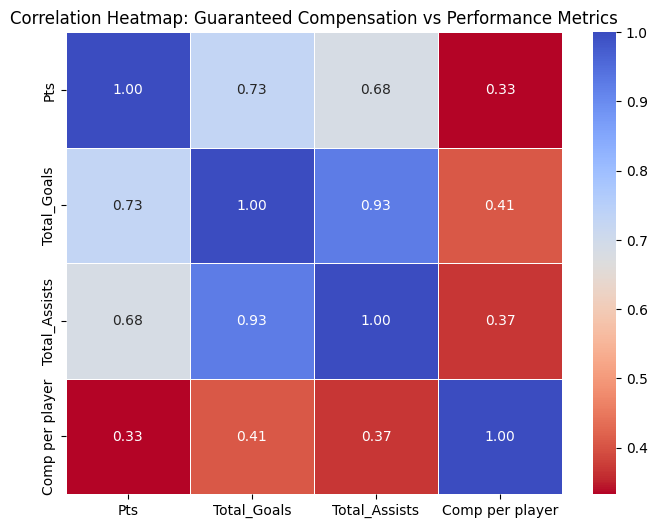

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select relevant numerical columns
numeric_cols = ['Pts', 'Total_Goals','Total_Assists' ,'Comp per player']

# Compute correlation matrix
corr_matrix = position[numeric_cols].corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm_r", linewidths=0.5)

# Labels and Title
plt.title("Correlation Heatmap: Guaranteed Compensation vs Performance Metrics")

# Show the plot
plt.show()


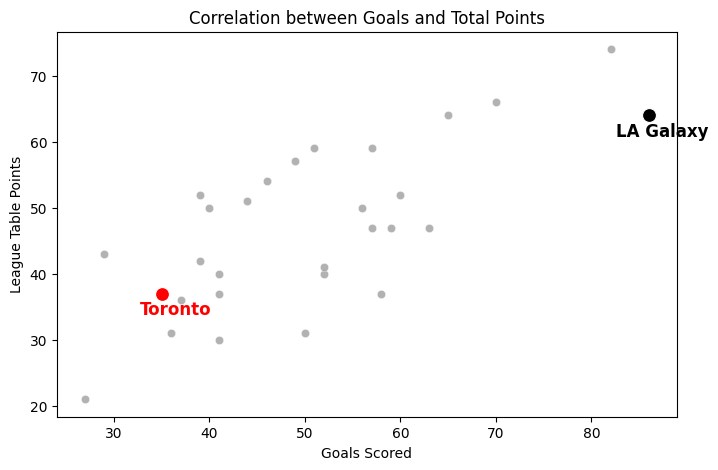

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the DataFrame is loaded
# position = pd.read_csv("your_data.csv")  # Uncomment if you need to load the data

# Define the teams to highlight
highlight_team_red = "Toronto"
highlight_team_blue = "LA Galaxy"

# Create a color column: red for Toronto, blue for LA Galaxy, grey for others
position['color'] = position['Team'].apply(lambda x: 'red' if x == highlight_team_red else ('gold' if x == highlight_team_blue else 'grey'))

plt.figure(figsize=(8, 5))

# Plot all teams in grey
sns.scatterplot(x=position['Total_Goals'], y=position['Pts'], color='grey', alpha=0.6)

# Plot Toronto in red
toronto_row = position[position['Team'] == highlight_team_red]
sns.scatterplot(x=toronto_row['Total_Goals'], y=toronto_row['Pts'], color='red', s=100)

# Plot LA Galaxy in blue
la_galaxy_row = position[position['Team'] == highlight_team_blue]
sns.scatterplot(x=la_galaxy_row['Total_Goals'], y=la_galaxy_row['Pts'], color='black', s=100)

# Annotate Toronto
plt.annotate(
    highlight_team_red,
    (toronto_row['Total_Goals'].values[0], toronto_row['Pts'].values[0]),
    textcoords="offset points",
    xytext=(10, -15),  # Offset for better visibility
    ha='center',
    fontsize=12,
    color='red',
    weight='bold'
)

# Annotate LA Galaxy
plt.annotate(
    highlight_team_blue,
    (la_galaxy_row['Total_Goals'].values[0], la_galaxy_row['Pts'].values[0]),
    textcoords="offset points",
    xytext=(10, -15),  # Offset for better visibility
    ha='center',
    fontsize=12,
    color='black',
    weight='bold'
)

plt.xlabel('Goals Scored')
plt.ylabel('League Table Points')
plt.title('Correlation between Goals and Total Points')
plt.show()



In [79]:
### Now lets take positions into account###

#filter mls data to just forwards and mids who have played more than 500 mins
mlsdata = mlsdata[mlsdata['Position'].isin(['Midfielder', 'Forward'])]
mlsdata = mlsdata[mlsdata['minutes_played_overall'] >= 500]

#out of the teams who spend money on attack, who overpays for forwards
team_summary_attack = mlsdata.groupby('Current Club').agg(
    Total_Compensation=('Guaranteed Compensation', 'sum'),
    Total_Goals=('goals_overall', 'sum'),
    Total_Assists=('assists_overall', 'sum'),
    Total_Minutes=('minutes_played_overall', 'sum'),
    Total_players = ('Player Name', 'count')
).reset_index()

# Team Cost Per Goal
team_summary_attack['Team Cost Per Goal'] = team_summary_attack['Total_Compensation'] / (team_summary_attack['Total_Goals'] + 1)
team_summary_attack['Team Cost Per Goal Per Player'] = team_summary_attack['Team Cost Per Goal'] / team_summary_attack['Total_players']
team_summary_attack.sort_values(by= 'Team Cost Per Goal Per Player', ascending= False)[0:4]

,Current Club,Total_Compensation,Total_Goals,Total_Assists,Total_Minutes,Total_players,Team Cost Per Goal,Team Cost Per Goal Per Player
27,Toronto,25122503,33,18,17825,11,738897.147059,67172.467914
9,Houston Dynamo,14683064,35,25,20624,10,407862.888889,40786.288889
23,SJ Earthquakes,7227205,20,18,14760,9,344152.619048,38239.179894
10,Inter Miami,34848299,72,51,19897,13,477373.958904,36721.073762


<ipython-input-80-c92ed35fec89>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
<ipython-input-80-c92ed35fec89>:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


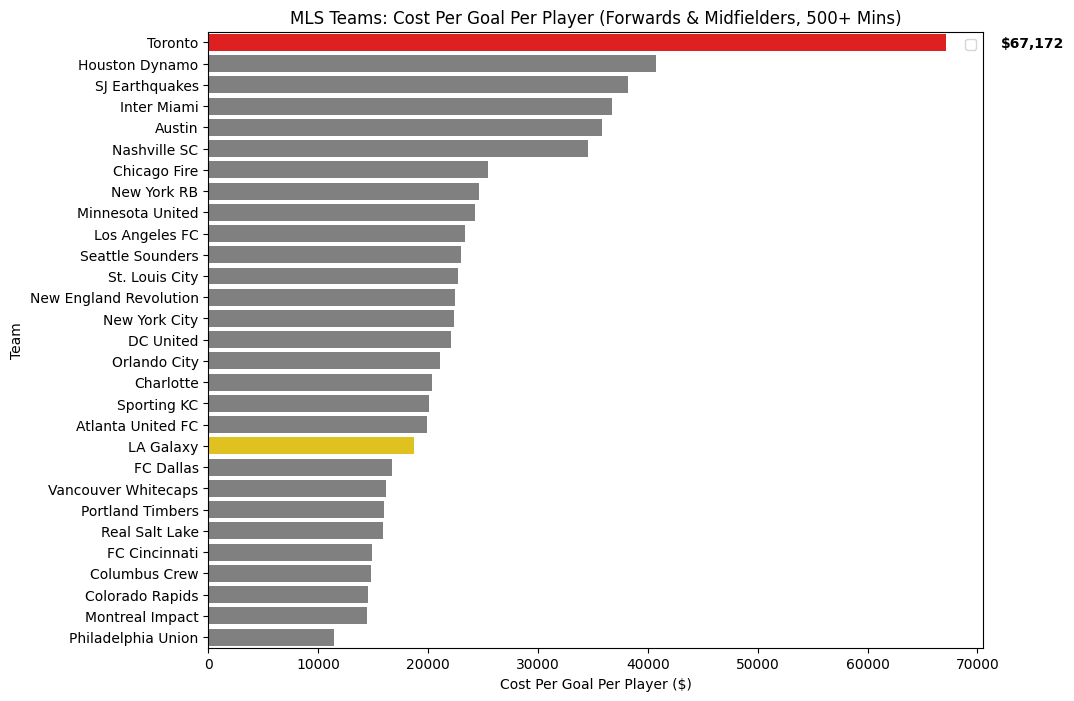

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort teams by cost per goal per player
team_summary_attack_sorted = team_summary_attack.sort_values(by='Team Cost Per Goal Per Player', ascending=False)

# Calculate average cost per goal per player
average_cost_per_goal = team_summary_attack_sorted['Team Cost Per Goal Per Player'].mean()

# Highlight Toronto in red, LA Galaxy in blue, others in grey
highlight_team_red = "Toronto"
highlight_team_gold = "LA Galaxy"
colors = ['red' if team == highlight_team_red else ('gold' if team == highlight_team_gold else 'grey') for team in team_summary_attack_sorted['Current Club']]

# Convert cost values to formatted strings with commas for better readability
team_summary_attack_sorted['Formatted Cost Per Goal'] = team_summary_attack_sorted['Team Cost Per Goal Per Player'].apply(lambda x: f"${x:,.0f}")

# Create horizontal bar chart
plt.figure(figsize=(10, 8))
ax = sns.barplot(
    y=team_summary_attack_sorted['Current Club'],
    x=team_summary_attack_sorted['Team Cost Per Goal Per Player'],
    palette=colors
)

# Add labels only for Toronto and LA Galaxy
for i, (team, value) in enumerate(zip(team_summary_attack_sorted['Current Club'], team_summary_attack_sorted['Team Cost Per Goal Per Player'])):
    if team in [highlight_team_red]:  # Only label Toronto and LA Galaxy
        ax.text(value + 5000, i, f"${value:,.0f}", va='center_baseline', fontsize=10, fontweight='bold')

# Add average line in yellow
#ax.axvline(average_cost_per_goal, color='black', linestyle='dashed', linewidth=2, label=f'Avg: ${average_cost_per_goal:,.0f}')

# Add labels and title
plt.ylabel('Team')
plt.xlabel('Cost Per Goal Per Player ($)')
plt.title('MLS Teams: Cost Per Goal Per Player (Forwards & Midfielders, 500+ Mins)')

# Add legend for average line
plt.legend()

# Show the plot
plt.show()




In [81]:
### Toronto is way overpaying for goals ###

toronto = mlsdata[mlsdata['Current Club'] == 'Toronto']
toronto = toronto[toronto['Position'] == 'Forward']
toronto[['Player Name', 'Guaranteed Compensation', 'goals_overall','assists_overall','minutes_played_overall','Position','DetailedPosition']].sort_values(by = 'Guaranteed Compensation',ascending= False)[0:5]

,Player Name,Guaranteed Compensation,goals_overall,assists_overall,minutes_played_overall,Position,DetailedPosition
482,Lorenzo Insigne,15400000,4,5,1358,Forward,Left Wing
749,Federico Bernardeschi,6295381,8,5,2463,Forward,Right Wing
147,Prince Osei Owusu,807500,9,0,1843,Forward,Center Forward
741,Deandre Kerr,105319,3,1,987,Forward,Right Wing
602,Kosi Thompson,100260,0,0,1084,Forward,Right Midfield


In [82]:
mlsdata.columns

Index(['BadName', 'Position', 'Current Club', 'minutes_played_overall',
       'nationality', 'appearances_overall', 'goals_overall',
       'assists_overall', 'penalty_goals', 'penalty_misses',
       'clean_sheets_overall', 'conceded_overall', 'yellow_cards_overall',
       'red_cards_overall', 'Player Name', 'DetailedPosition', 'Base Salary',
       'Guaranteed Compensation'],
      dtype='object')

In [83]:
mlsdata['Goal Contributions'] = mlsdata['goals_overall']

In [84]:
### Feature Engineering ###
#Metrics for player analysis###

#derived goal metrics
mlsdata['Cost Per Goal'] = mlsdata['Guaranteed Compensation'] / (mlsdata['goals_overall'] + 1)
mlsdata['Goals per 90'] = (mlsdata['goals_overall'] / mlsdata['minutes_played_overall']) * 90
mlsdata['Cost Per Goal per 90'] = mlsdata['Guaranteed Compensation'] / (mlsdata['Goals per 90'] + 1)

#derived assist metrics
mlsdata['Cost Per Assist'] = mlsdata['Guaranteed Compensation'] / (mlsdata['assists_overall'] + 1)
mlsdata['Assists per 90'] = (mlsdata['assists_overall'] / mlsdata['minutes_played_overall']) * 90
mlsdata['Cost Assists Goal per 90'] = mlsdata['Guaranteed Compensation'] / (mlsdata['Assists per 90'] + 1)

mlsdata['Cost per Goal + Assist'] = (mlsdata['Cost Per Goal'] + mlsdata['Cost Per Assist']) / 2
#Look for Left Winger to replace Insigne
lw = mlsdata[mlsdata['DetailedPosition'] == 'Left Wing']

lw.sort_values(by = 'Cost per Goal + Assist')[0:3][['Player Name','DetailedPosition','Guaranteed Compensation','Current Club','goals_overall','assists_overall']][0:1]

,Player Name,DetailedPosition,Guaranteed Compensation,Current Club,goals_overall,assists_overall
189,Yamil Asad,Left Wing,89716,FC Cincinnati,4,5


In [85]:
#Look for Right Winger to replace Bernardesch

### Feature Engineering ###
#Metrics for player analysis###

rw = mlsdata[mlsdata['Position'] == 'Forward']

rw.sort_values(by = 'Cost Per Goal')[0:5][['Player Name','DetailedPosition','Guaranteed Compensation','Current Club','goals_overall','assists_overall']][0:5]

,Player Name,DetailedPosition,Guaranteed Compensation,Current Club,goals_overall,assists_overall
334,Patrick Agyemang,Center Forward,71401,Charlotte,10,3
186,Tani Oluwaseyi,Center Forward,89716,Minnesota United,8,5
747,Logan Farrington,Center Forward,71401,FC Dallas,4,5
398,Stephen Afrifa,Center Forward,71401,Sporting KC,4,2
48,Max Arfsten,Right Wing,91561,Columbus Crew,5,5


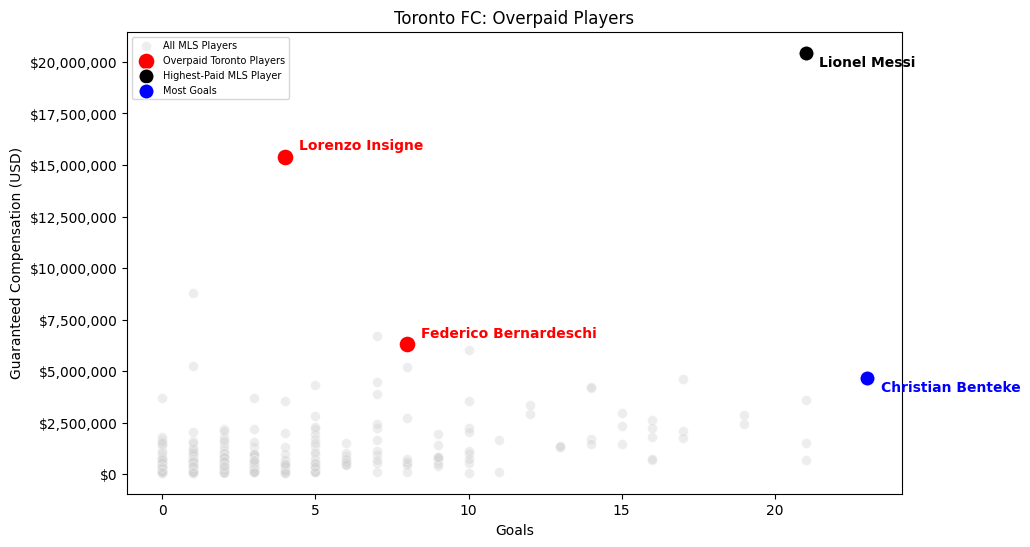

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Sort Toronto players by salary and select top 2 highest-paid players
toronto_players = mlsdata[mlsdata['Current Club'] == 'Toronto']
top_earning_toronto_players = toronto_players.nlargest(2, 'Guaranteed Compensation')

# Get top 1 highest-paid player in the MLS
top_earning_mls_players = mlsdata.nlargest(1, 'Guaranteed Compensation')

# Get top 1 highest goal scorer in the MLS
top_goal_scorers = mlsdata.nlargest(1, 'Goal Contributions')

# Get top replacement for LW and RW
top_lw_replacement = mlsdata[mlsdata['DetailedPosition'] == 'Left Wing'].nsmallest(1, 'Cost per Goal + Assist')
top_rw_replacement = mlsdata[mlsdata['DetailedPosition'] == 'Right Wing'].nsmallest(1, 'Cost per Goal + Assist')

# Create figure
plt.figure(figsize=(10, 6))

# Plot all players in **light grey** for background
sns.scatterplot(x=mlsdata['Goal Contributions'], y=mlsdata['Guaranteed Compensation'],
                color='lightgrey', alpha=0.4, s=50, label="All MLS Players")

# Plot top 2 earning Toronto players in **red**
sns.scatterplot(x=top_earning_toronto_players['Goal Contributions'],
                y=top_earning_toronto_players['Guaranteed Compensation'],
                color='red', s=150, label="Overpaid Toronto Players")

# Plot top 1 highest-paid MLS player in **black**
sns.scatterplot(x=top_earning_mls_players['Goal Contributions'],
                y=top_earning_mls_players['Guaranteed Compensation'],
                color='black', s=120, label="Highest-Paid MLS Player")

# Plot top 1 goal scorer in **blue**
sns.scatterplot(x=top_goal_scorers['Goal Contributions'],
                y=top_goal_scorers['Guaranteed Compensation'],
                color='blue', s=120, label="Most Goals")

# Annotate only the key players
def annotate_players(df, color, offset=(10, 5)):
    for _, row in df.iterrows():
        plt.annotate(row['Player Name'],
                     (row['Goal Contributions'], row['Guaranteed Compensation']),
                     textcoords="offset points", xytext=offset, ha='left',
                     fontsize=10, color=color, weight='bold')

# Annotate selected key players
annotate_players(top_earning_toronto_players, "red")
annotate_players(top_earning_mls_players, "black", offset=(10, -10))
annotate_players(top_goal_scorers, "blue", offset=(10, -10))

# Format Y-axis to USD with commas and dollar signs
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Labels and Title
plt.xlabel('Goals')
plt.ylabel('Guaranteed Compensation (USD)')
plt.title("Toronto FC: Overpaid Players")

# Add a legend to explain colors
plt.legend(loc="upper left", fontsize=7, frameon=True)

# Show the plot
plt.show()




In [87]:
### Tell Toronto GM to get rid of those two, replace with below

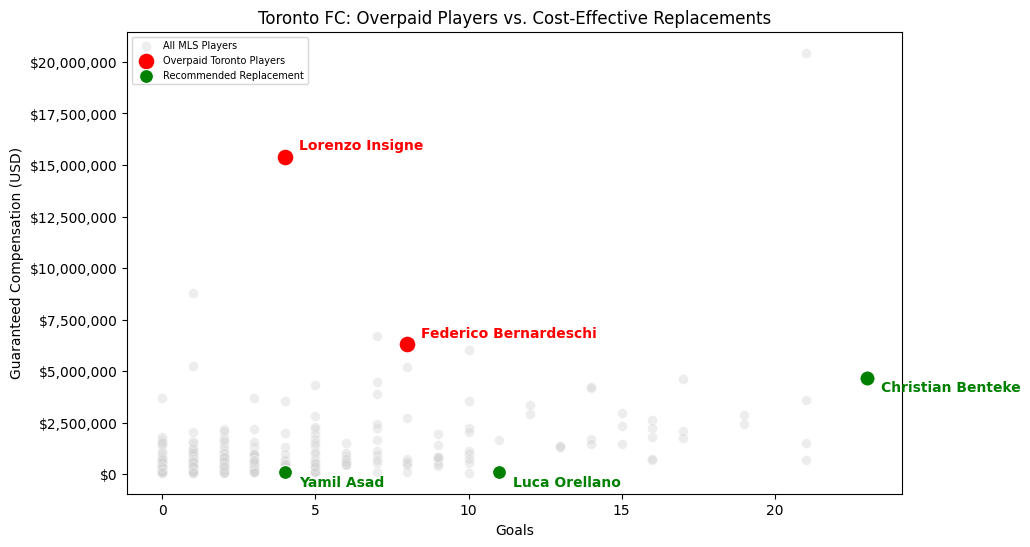

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Sort Toronto players by salary and select top 2 highest-paid players
toronto_players = mlsdata[mlsdata['Current Club'] == 'Toronto']
top_earning_toronto_players = toronto_players.nlargest(2, 'Guaranteed Compensation')

# Get top 1 highest-paid player in the MLS
top_earning_mls_players = mlsdata.nlargest(1, 'Guaranteed Compensation')

# Get top 1 highest goal scorer in the MLS
top_goal_scorers = mlsdata.nlargest(1, 'Goal Contributions')

# Get top replacement for LW and RW
top_lw_replacement = mlsdata[mlsdata['DetailedPosition'] == 'Left Wing'].nsmallest(1, 'Cost per Goal + Assist')
top_rw_replacement = mlsdata[mlsdata['DetailedPosition'] == 'Right Wing'].nsmallest(1, 'Cost per Goal + Assist')

# Create figure
plt.figure(figsize=(10, 6))

# Plot all players in **light grey** for background
sns.scatterplot(x=mlsdata['Goal Contributions'], y=mlsdata['Guaranteed Compensation'],
                color='lightgrey', alpha=0.4, s=50, label="All MLS Players")

# Plot top 2 earning Toronto players in **red**
sns.scatterplot(x=top_earning_toronto_players['Goal Contributions'],
                y=top_earning_toronto_players['Guaranteed Compensation'],
                color='red', s=150, label="Overpaid Toronto Players")

# Plot LW and RW replacements in **green**
sns.scatterplot(x=top_lw_replacement['Goal Contributions'],
                y=top_lw_replacement['Guaranteed Compensation'],
                color='green', s=100,)

sns.scatterplot(x=top_rw_replacement['Goal Contributions'],
                y=top_rw_replacement['Guaranteed Compensation'],
                color='green', s=100, label="Recommended Replacement")

# Plot top 1 highest-paid MLS player in **black**
#sns.scatterplot(x=top_earning_mls_players['Goal Contributions'],
                #y=top_earning_mls_players['Guaranteed Compensation'],
                #color='black', s=120, label="Highest-Paid MLS Player")

#Plot top 1 goal scorer in **blue**
sns.scatterplot(x=top_goal_scorers['Goal Contributions'],
                y=top_goal_scorers['Guaranteed Compensation'],
                color='green', s=120)

# Annotate only the key players
def annotate_players(df, color, offset=(10, 5)):
    for _, row in df.iterrows():
        plt.annotate(row['Player Name'],
                     (row['Goal Contributions'], row['Guaranteed Compensation']),
                     textcoords="offset points", xytext=offset, ha='left',
                     fontsize=10, color=color, weight='bold')

# Annotate selected key players
annotate_players(top_earning_toronto_players, "red")
#annotate_players(top_earning_mls_players, "black", offset=(10, -10))
annotate_players(top_goal_scorers, "green", offset=(10, -10))
annotate_players(top_lw_replacement, "green", offset=(10, -10))
annotate_players(top_rw_replacement, "green", offset=(10, -10))

# Format Y-axis to USD with commas and dollar signs
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Labels and Title
plt.xlabel('Goals')
plt.ylabel('Guaranteed Compensation (USD)')
plt.title("Toronto FC: Overpaid Players vs. Cost-Effective Replacements")

# Add a legend to explain colors
plt.legend(loc="upper left", fontsize=7, frameon=True)

# Show the plot
###plt.show()


In [89]:
### This is the old code


# Remove Insigne and Bernardeschi from Toronto
team_summary_attack_updated = team_summary_attack[~team_summary_attack['Current Club'].isin(['Toronto'])]
toronto_old = team_summary_attack[team_summary_attack['Current Club'] == 'Toronto'].copy()

# Define new Toronto squad with Orellano and Asad added
new_toronto_players = pd.DataFrame({
    'Current Club': ['Toronto (New)'],
    'Total_Compensation': [toronto_old['Total_Compensation'].sum() - sum(toronto_old[toronto_old['Current Club'] == 'Toronto']['Total_Compensation']) + 2500000 + 1200000],  # Remove Insigne/Bernardeschi, add Orellano & Asad
    'Total_Goals': [toronto_old['Total_Goals'].sum() - sum(toronto_old[toronto_old['Current Club'] == 'Toronto']['Total_Goals']) + 10 + 8],  # Replace with Orellano (10G) & Asad (8G)
    'Total_players': [toronto_old['Total_players'].sum() - 2 + 2]  # Swap 2 out, 2 in
})

# Recalculate Toronto’s Cost Per Goal Per Player
new_toronto_players['Team Cost Per Goal'] = new_toronto_players['Total_Compensation'] / (new_toronto_players['Total_Goals'] + 1)
new_toronto_players['Team Cost Per Goal Per Player'] = new_toronto_players['Team Cost Per Goal'] / new_toronto_players['Total_players']

# Rename old Toronto entry
toronto_old['Current Club'] = 'Toronto (Old)'

# Update dataset with new Toronto
team_summary_attack_updated = pd.concat([team_summary_attack_updated, toronto_old, new_toronto_players])

# Recalculate sorted teams
team_summary_attack_sorted = team_summary_attack_updated.sort_values(by='Team Cost Per Goal Per Player', ascending=False)

# Calculate new average cost per goal per player
average_cost_per_goal = team_summary_attack_sorted['Team Cost Per Goal Per Player'].mean()

# Assign colors
color_mapping = {
    "Toronto (Old)": "red",
    "Toronto (New)": "Blue",
    "LA Galaxy": "Gold"
}
team_summary_attack_sorted['color'] = team_summary_attack_sorted['Current Club'].map(lambda x: color_mapping.get(x, "grey"))

# Convert colors to a list for Seaborn
colors = team_summary_attack_sorted['color'].tolist()

# # Create horizontal bar chart
# plt.figure(figsize=(10, 8))
# ax = sns.barplot(
#     y=team_summary_attack_sorted['Current Club'],
#     x=team_summary_attack_sorted['Team Cost Per Goal Per Player'],
#     palette=colors
# )

# # Add labels only for Old and New Toronto
# for i, (team, value) in enumerate(zip(team_summary_attack_sorted['Current Club'], team_summary_attack_sorted['Team Cost Per Goal Per Player'])):
#     if team in ["Toronto (Old)", "Toronto (New)"]:
#         ax.text(value + 5000, i, f"${value:,.0f}", va='center_baseline', fontsize=10, fontweight='bold')


# # Add labels and title
# plt.ylabel('Team')
# plt.xlabel('Cost Per Goal Per Player ($)')
# plt.title('MLS Teams: Cost Per Goal Per Player (Before & After Toronto Changes)')

# # Add legend for average line
# plt.legend()

# # # Show the plot
# #plt.show()


<ipython-input-90-89b1532064ba>:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
<ipython-input-90-89b1532064ba>:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels)


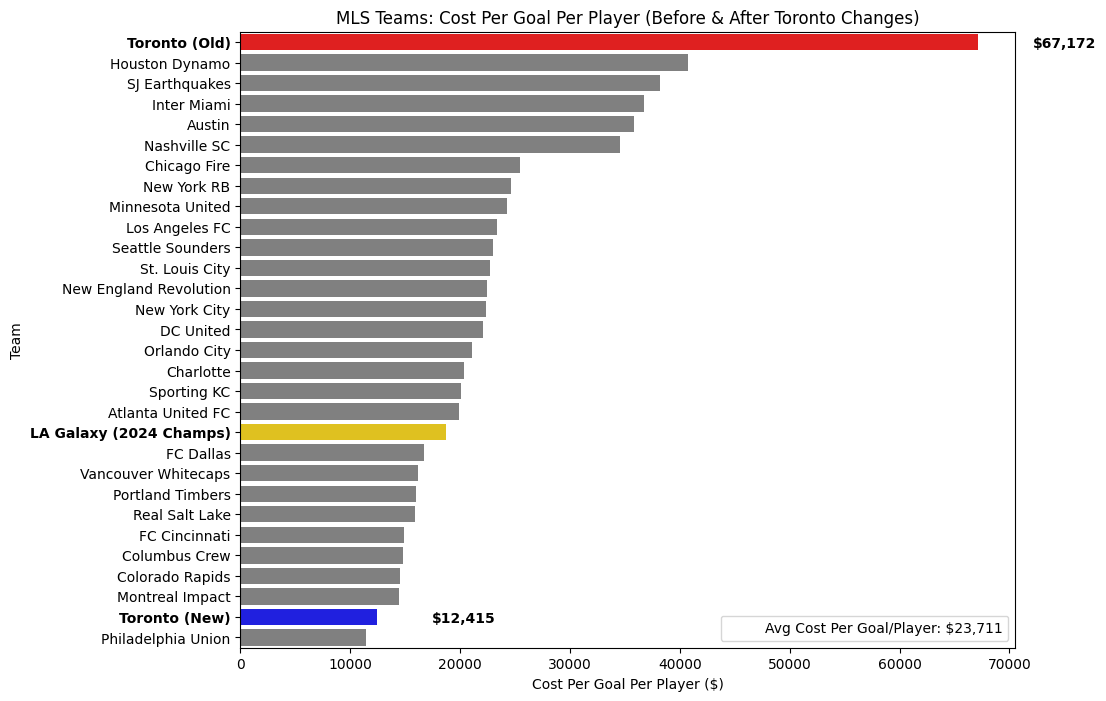

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Players to remove from Toronto
players_to_remove = ["Lorenzo Insigne", "Federico Bernardeschi", "Kosi Thompson"]

# Lookup their total compensation, goals, and assists
removed_players = mlsdata[mlsdata['Player Name'].isin(players_to_remove)]
removed_compensation = removed_players['Guaranteed Compensation'].sum()
removed_goals = removed_players['goals_overall'].sum()
removed_assists = removed_players['assists_overall'].sum()
removed_players_count = removed_players.shape[0]

# Remove these players from Toronto’s data
toronto_players = mlsdata[mlsdata['Current Club'] == 'Toronto']
toronto_cleaned = toronto_players[~toronto_players['Player Name'].isin(players_to_remove)]

# Look for best value Left Wing (LW) and Right Wing (RW) replacements
best_lw_replacement = mlsdata[mlsdata['DetailedPosition'] == 'Left Wing'].nsmallest(1, 'Cost per Goal + Assist')
best_rw_replacement = mlsdata[mlsdata['DetailedPosition'] == 'Right Wing'].nsmallest(1, 'Cost per Goal + Assist')

# Lookup Benteke as the Forward replacement
benteke_replacement = mlsdata[mlsdata['Player Name'] == 'Christian Benteke']

# Combine the three replacement players
new_players = pd.concat([best_lw_replacement, best_rw_replacement, benteke_replacement], ignore_index=True)

# Ensure they have the same structure as `mlsdata`
new_players['Current Club'] = 'Toronto'

# Lookup their compensation, goals, assists
new_compensation = new_players['Guaranteed Compensation'].sum()
new_goals = new_players['goals_overall'].sum()
new_assists = new_players['assists_overall'].sum()
new_players_count = new_players.shape[0]

# Add replacements to Toronto’s team
toronto_updated = pd.concat([toronto_cleaned, new_players], ignore_index=True)

# Recalculate Team-Level Stats for Toronto
new_toronto_summary = toronto_updated.groupby('Current Club').agg(
    Total_Compensation=('Guaranteed Compensation', 'sum'),
    Total_Goals=('goals_overall', 'sum'),
    Total_Assists=('assists_overall', 'sum'),
    Total_Minutes=('minutes_played_overall', 'sum'),
    Total_players=('Player Name', 'count')
).reset_index()

# Compute Cost Per Goal Metrics
new_toronto_summary['Team Cost Per Goal'] = new_toronto_summary['Total_Compensation'] / (new_toronto_summary['Total_Goals'] + 1)
new_toronto_summary['Team Cost Per Goal Per Player'] = new_toronto_summary['Team Cost Per Goal'] / new_toronto_summary['Total_players']
new_toronto_summary['Current Club'] = 'Toronto (New)'

# Store Toronto's old stats before changes
old_toronto_summary = team_summary_attack[team_summary_attack['Current Club'] == 'Toronto'].copy()
old_toronto_summary['Current Club'] = 'Toronto (Old)'

# Remove old Toronto from team summary dataset
team_summary_attack_updated = team_summary_attack[team_summary_attack['Current Club'] != 'Toronto']

# Combine old and new Toronto versions
team_summary_attack_updated = pd.concat([team_summary_attack_updated, old_toronto_summary, new_toronto_summary], ignore_index=True)

# Sort and get new average
team_summary_attack_sorted = team_summary_attack_updated.sort_values(by='Team Cost Per Goal Per Player', ascending=False)
average_cost_per_goal = team_summary_attack_sorted['Team Cost Per Goal Per Player'].mean()

# Assign colors
color_mapping = {
    "Toronto (Old)": "red",
    "Toronto (New)": "blue",
    "LA Galaxy": "gold"
}
team_summary_attack_sorted['color'] = team_summary_attack_sorted['Current Club'].map(lambda x: color_mapping.get(x, "grey"))

# Convert colors to a list for Seaborn
colors = team_summary_attack_sorted['color'].tolist()

# Create horizontal bar chart
plt.figure(figsize=(10, 8))
ax = sns.barplot(
    y=team_summary_attack_sorted['Current Club'],
    x=team_summary_attack_sorted['Team Cost Per Goal Per Player'],
    palette=colors
)

# Bold specific team names on y-axis
for tick_label in ax.get_yticklabels():
    if tick_label.get_text() in ["Toronto (Old)", "Toronto (New)", "LA Galaxy"]:
        tick_label.set_fontweight('bold')

# Update only the y-axis label for LA Galaxy without modifying the dataset
y_labels = [label.get_text() for label in ax.get_yticklabels()]
y_labels = ["LA Galaxy (2024 Champs)" if label == "LA Galaxy" else label for label in y_labels]
ax.set_yticklabels(y_labels)


# Add labels only for Old and New Toronto
for i, (team, value) in enumerate(zip(team_summary_attack_sorted['Current Club'], team_summary_attack_sorted['Team Cost Per Goal Per Player'])):
    if team in ["Toronto (Old)", "Toronto (New)"]:
        ax.text(value + 5000, i, f"${value:,.0f}", va='center_baseline', fontsize=10, fontweight='bold')

# Add average line in black
#ax.axvline(average_cost_per_goal, color='black', linestyle='dashed', linewidth=2)

# Manually add the average number to the legend
legend_label = f'Avg Cost Per Goal/Player: ${average_cost_per_goal:,.0f}'
plt.legend([plt.Line2D([0], [0], color='white', marker='o', markersize=0)], [legend_label])

# Add labels and title
plt.ylabel('Team')
plt.xlabel('Cost Per Goal Per Player ($)')
plt.title('MLS Teams: Cost Per Goal Per Player (Before & After Toronto Changes)')

# Show the plot
plt.show()


<ipython-input-91-534bdfe9f1ff>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


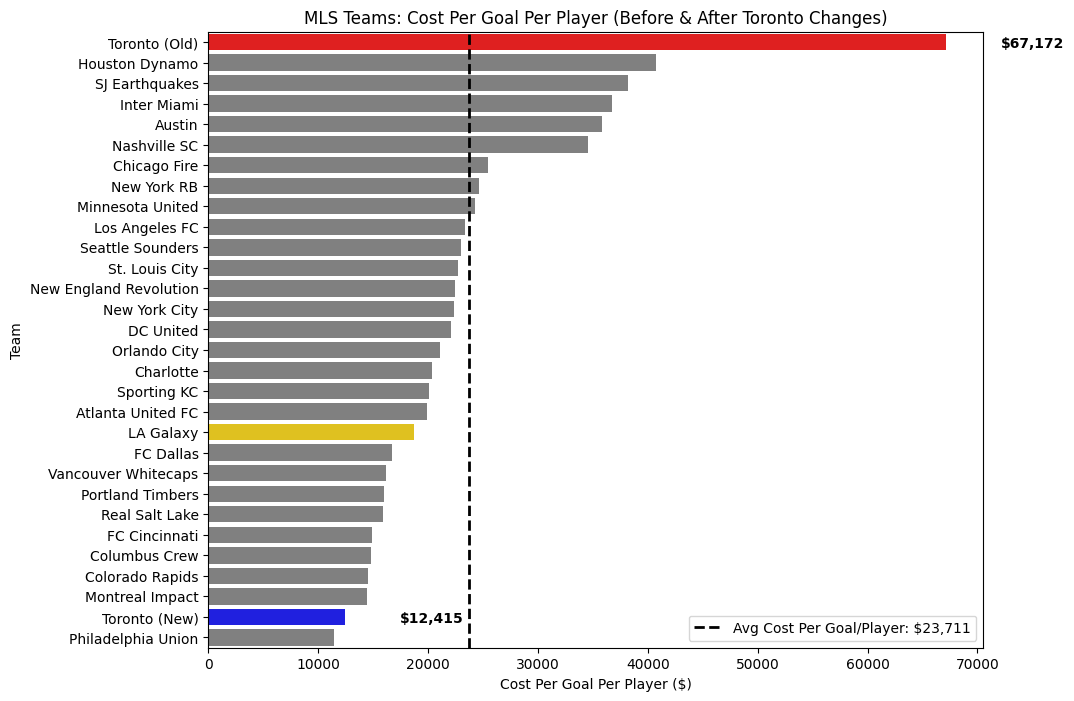

In [91]:
# Create horizontal bar chart
plt.figure(figsize=(10, 8))
ax = sns.barplot(
    y=team_summary_attack_sorted['Current Club'],
    x=team_summary_attack_sorted['Team Cost Per Goal Per Player'],
    palette=colors
)

# Add labels only for Old and New Toronto
for i, (team, value) in enumerate(zip(team_summary_attack_sorted['Current Club'], team_summary_attack_sorted['Team Cost Per Goal Per Player'])):
    if team in ["Toronto (Old)", "Toronto (New)"]:
        ax.text(value + 5000, i, f"${value:,.0f}", va='center_baseline', fontsize=10, fontweight='bold')

# Add average line in black
ax.axvline(average_cost_per_goal, color='black', linestyle='dashed', linewidth=2)

# Manually add the average number to the legend
legend_label = f'Avg Cost Per Goal/Player: ${average_cost_per_goal:,.0f}'
plt.legend([plt.Line2D([0], [0], color='black', linestyle='dashed', linewidth=2)], [legend_label])

# Add labels and title
plt.ylabel('Team')
plt.xlabel('Cost Per Goal Per Player ($)')
plt.title('MLS Teams: Cost Per Goal Per Player (Before & After Toronto Changes)')

# Show the plot
plt.show()


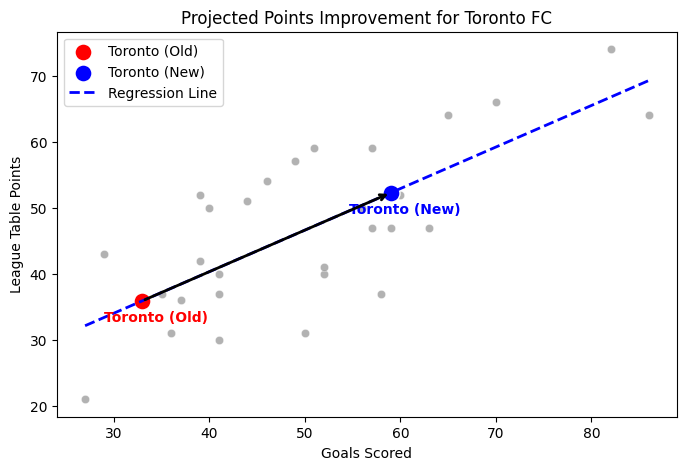

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Prepare regression data
X = position[['Total_Goals']].values  # Independent variable (Goals)
y = position['Pts'].values  # Dependent variable (Points)

# Fit a linear regression model
reg = LinearRegression()
reg.fit(X, y)

# Predict points for the new Toronto team based on the regression
old_toronto_goals = old_toronto_summary['Total_Goals'].values[0]
new_toronto_goals = new_toronto_summary['Total_Goals'].values[0]

old_toronto_predicted_pts = reg.predict([[old_toronto_goals]])[0]
new_toronto_predicted_pts = reg.predict([[new_toronto_goals]])[0]

# Update position dataset with new Toronto (for plotting)
new_toronto_row = pd.DataFrame({
    'Team': ['Toronto (New)'],
    'Total_Goals': [new_toronto_goals],
    'Pts': [new_toronto_predicted_pts]
})

old_toronto_row = pd.DataFrame({
    'Team': ['Toronto (Old)'],
    'Total_Goals': [old_toronto_goals],
    'Pts': [old_toronto_predicted_pts]
})

# Merge new Toronto into dataset for visualization
position_updated = pd.concat([position, old_toronto_row, new_toronto_row], ignore_index=True)

# Create scatter plot
plt.figure(figsize=(8, 5))

# Plot all teams in grey
sns.scatterplot(x=position['Total_Goals'], y=position['Pts'], color='grey', alpha=0.6)

# Plot Toronto (Old) in red
sns.scatterplot(x=old_toronto_row['Total_Goals'], y=old_toronto_row['Pts'], color='red', s=150, label="Toronto (Old)")

# Plot Toronto (New) in green
sns.scatterplot(x=new_toronto_row['Total_Goals'], y=new_toronto_row['Pts'], color='blue', s=150, label="Toronto (New)")

# Annotate Toronto points
plt.annotate(
    "Toronto (Old)",
    (old_toronto_goals, old_toronto_predicted_pts),
    textcoords="offset points",
    xytext=(10, -15),  # Offset for better visibility
    ha='center',
    fontsize=10,
    color='red',
    weight='bold'
)

plt.annotate(
    "Toronto (New)",
    (new_toronto_goals, new_toronto_predicted_pts),
    textcoords="offset points",
    xytext=(10, -15),  # Offset for better visibility
    ha='center',
    fontsize=10,
    color='blue',
    weight='bold'
)

# Draw an arrow showing Toronto's improvement
plt.annotate(
    '',
    xy=(new_toronto_goals, new_toronto_predicted_pts),
    xytext=(old_toronto_goals, old_toronto_predicted_pts),
    arrowprops=dict(arrowstyle='->', color='black', linewidth=2)
)

# Regression line (trendline)
x_range = np.linspace(position['Total_Goals'].min(), position['Total_Goals'].max(), 100).reshape(-1, 1)
y_pred = reg.predict(x_range)

plt.plot(x_range, y_pred, color='blue', linestyle='dashed', linewidth=2, label='Regression Line')

# Labels and Title
plt.xlabel('Goals Scored')
plt.ylabel('League Table Points')
plt.title('Projected Points Improvement for Toronto FC')
plt.legend()

# Show the plot
plt.show()
